# MODUL 1 HISTOGRAM KONVOLUSI DAN OPERASI DASAR CARA

kode di bawah merupakan bagian dari pengimporan library yang digunakan pada program ini. Library NumPy digunakan untuk melakukan operasi matematika pada array, library Matplotlib digunakan untuk menampilkan gambar, dan library OpenCV digunakan untuk melakukan operasi pengolahan citra seperti konvolusi, filter, thresholding, dll.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv


Fungsi di bawah berfungsi untuk memanggil library matplotlib.pyplot dan untuk menginputkan gambar.
script "plt" berfungsi untuk memanggil library matplotlib.pyplot dan berfungsi untuk menampilkan gambar dari variabel "img"

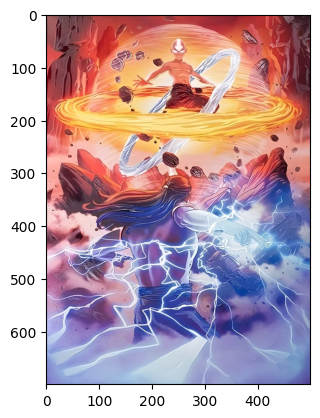

In [8]:
image = img.imread("aang.jpg")
plt.imshow(image)

1.mengubah gambar menjadi grayscale

Fungsi di bawah berfungsi untuk mengkonversi warna dan mengkonversi citra menjadi gray.
dan script yang dibawah untuk menetapkan warna gambar menjadi gray.

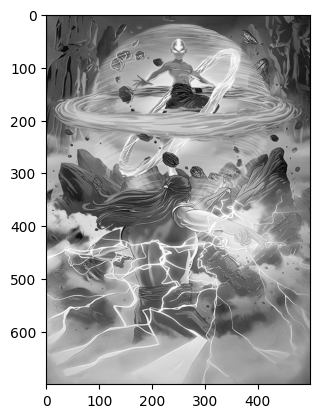

In [9]:
grayimage = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(grayimage,cmap='gray')


fungsi di bawah ini untuk menetapkan nilai maksimal. apabilai bernilai negatif maka di bulatkan menjadi 0.

In [10]:
sumgray=np.zeros(256)

fungsi di bawah berfungsi untuk mendapatkan tinggi dan lebar dari variabel gray_img kemudian di simpan pada variabel.
untuk script astype nya untuk di atur agar datanya menjadi integer.
Perulangan yang dibawah untuk mengakses setiap piksel dari citra dan i untuk tinggi, j untuk lebar

In [11]:
tinggi , lebar = grayimage.shape
print("tinggi:", tinggi, ", lebar:", lebar)
sumGray = np.zeros(256).astype(int)
for i in range(tinggi):
    for j in range(lebar):
        val = grayimage[i,j]
        sumGray[val] += 1

tinggi: 700 , lebar: 500


fungsi dibawah untuk mencari total gray dalam value yang ada. dan script paling bawah utnuk membuat diagram dan membandingkan nilai grayvalue dan sumgray untuk mendapatkan grafiknya.

In [12]:
print(sumGray)

[   0    0    0   11   22   29   59   76   59   73   68   73   92   77
  110  103  159  127  130  162  171  163  157  147  146  150  143  168
  191  249  348  362  401  412  360  375  389  400  396  406  484  430
  482  473  538  502  589  584  614  592  620  635  636  662  680  819
  772  900  916  943 1066 1100 1142 1183 1273 1282 1207 1189 1140 1242
 1491 1756 1787 1930 1881 1894 2034 2083 2180 2174 2128 2059 1966 1942
 1893 1810 1774 1773 1848 1891 1830 1764 1744 1743 1749 1717 1833 1938
 1744 1732 1788 1829 1869 1859 1664 1715 1787 1727 1754 1767 1881 1813
 1900 1811 1843 1811 1810 1784 1757 1845 1758 1681 1712 1752 1724 1717
 1734 1723 1647 1630 1781 1646 1679 1757 1793 1724 1791 1876 1971 1948
 2109 2034 2081 2079 2157 2129 2182 2059 2143 2203 2221 2204 2269 2445
 2404 2359 2277 2557 2670 2690 2636 2607 2768 2709 2767 2953 2752 2708
 2622 2671 2592 2497 2534 2478 2643 2654 2540 2556 2467 2394 2529 2463
 2606 2672 2411 2481 2564 2436 2509 2483 2168 2146 2167 2026 1807 1705
 1653 

fungsi di bawah berfungsi untuk menampilkan jumlah warna keabuan 

In [13]:
sumGray.sum()

350000

2.Membuat histogram

fungsi dibawah untuk mencari total gray dalam value yang ada. dan script paling bawah untuk membuat diagram dan membandingkan nilai grayvalue dan sumgray untuk mendapatkan grafiknya.

<BarContainer object of 256 artists>

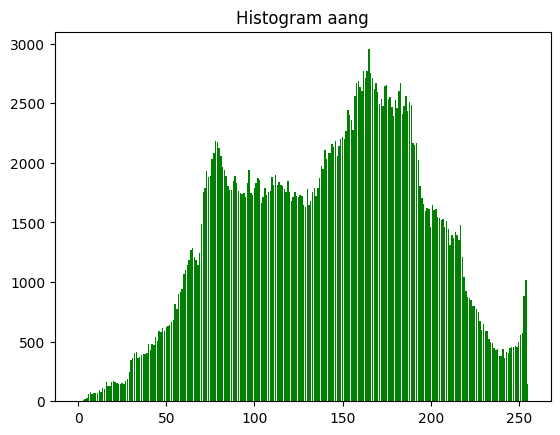

In [14]:
grayvalue =[i for i in range (256)]
plt.title('Histogram aang')
plt.bar(grayvalue,sumGray,color='green')

2. konvolusi pada citra 

dengan zero padding dan dengan kernel berikut

                ([[1, 2, -1, 1],
                  [0, 2, 1, 2 ], 
                  [2, 1, 1, 0 ], 
                  [1, 0, -1, 0]])

fungsi di bawah ini berfungsi untuk menetapkan variabel kernel sebagai variabel bertipe array

In [15]:
kernel = np.array([[1, 2, -1, 1], 
                   [0, 2, 1, 2 ], 
                   [2, 1, 1, 0 ], 
                   [1, 0, -1, 0]])

print(kernel)

[[ 1  2 -1  1]
 [ 0  2  1  2]
 [ 2  1  1  0]
 [ 1  0 -1  0]]


In [16]:
img_tinggi, img_lebar = grayimage.shape
kernel_tinggi, kernel_lebar = kernel.shape

fungsi di atas ini untuk mencari ukuran gambaran dan ukuran kernel

In [17]:
padding_size = int((kernel_tinggi - 1) / 2)
pad_width=((padding_size, padding_size+1), (padding_size, padding_size+1))
padding_grayimage = np.pad(grayimage, pad_width, mode='constant')
zeroPadding = np.zeros((img_tinggi, img_lebar))

fungsi di atas berfungsi untuk menentukan ukuran padding yang ditambahkan kedalam gambar dan agar nilainya tidak berubah.

fungsi di bawah berfungsi untuk membaca tiap indeksi pada array zero padding dan untuk mencari hasil nilai dari ukuran kernel tersebut.

In [18]:
for i in range(zeroPadding.shape[0]):
    for j in range(zeroPadding.shape[1]):   
        subset = padding_grayimage[i:i + kernel_tinggi, j:j + kernel_lebar]
        weighted_subset = subset * kernel
        sum_of_weighted_subset = np.sum(weighted_subset)
        zeroPadding[i][j] = np.round(sum_of_weighted_subset)
print (zeroPadding)


[[ 824. 1142. 1024. ...  194.  179.  161.]
 [1108. 1460. 1312. ...  289.  280.  247.]
 [1083. 1418. 1260. ...  326.  325.  286.]
 ...
 [1233. 1809. 1737. ... 1140.  857.  859.]
 [1383. 1803. 1758. ... 1137.  850.  759.]
 [1084. 1199. 1183. ...  754.  472.  473.]]


dibawah ini berfungsi untuk mencari nilai minimum dan maksimum dari seluruh piksel setelah di konvolusi dan mencari nilai array hasil dari clipping

In [19]:
min = np.min(zeroPadding)
max = np.max(zeroPadding)
clipping = np.round((zeroPadding - min) / (max - min))
print(clipping)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


fungsi dari code dibawah ini untuk menampilkan hasil gambar yang sudah di olah sebelumnya pada variable clip dngan color map yang gray.

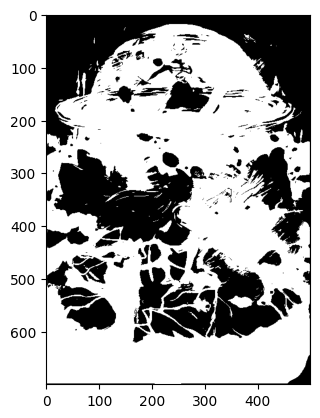

In [20]:
plt.imshow(clipping,cmap='gray')

ROTASI = 40 | TRANSLASI = X : 300, Y : -163

fungsi dibawah memindahkan setiap piksel citra sesuai dengan jarak yang diinginkan. Proses ini dilakukan pada setiap piksel dengan menggunakan nilai pada baris dan kolom grayimage untuk menentukan posisi baru piksel pada citra hasil translasi.

(700, 500)


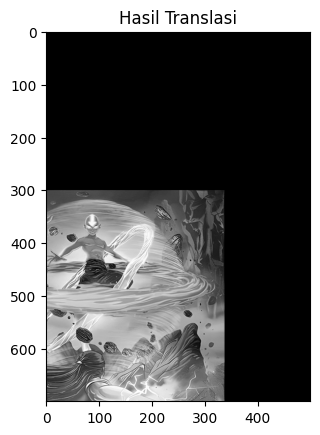

In [25]:
translasi = np.zeros((tinggi, lebar)).astype(int)
for i in range (tinggi) :
    for j in range (lebar) :
        if i-300>0 and j+163<lebar :
            translasi[i][j] = grayimage[i-300][j+163]
plt.title("Hasil Translasi")
plt.imshow(translasi,cmap="gray")


fungsi dibawah memutar citra sesuai dengan sudut yang diinginkan yaitu 40 derajat. Proses ini dilakukan pada setiap piksel citra dengan menggunakan nilai baris dan kolom piksel pada citra yang baru dirotasi.

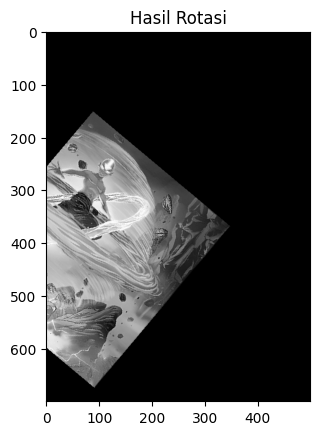

In [28]:
tinggitr , lebartr = translasi.shape
rotasi = np.zeros((tinggitr,lebartr)).astype(int)
sudut= np.deg2rad(-40)
cos=np.cos(sudut)
sin=np.sin(sudut)
tinggitengah = int((tinggitr-1)/2)
lebartengah = int((lebartr-1)/2)
for i in range (rotasi.shape[0]):
    for j in range (rotasi.shape[1]):
        x=(i-tinggitengah)*cos+(j-lebartengah)*sin
        y=-(i-tinggitengah)*sin+(j-lebartengah)*cos
        x = int(x + tinggitengah)
        y = int(y + lebartengah)
        if x>=0 and y>=0 and x<rotasi.shape[0] and y<rotasi.shape[1] :
            rotasi[i][j]= translasi[x][y]
plt.title("Hasil Rotasi")
plt.imshow(rotasi,cmap="gray")

fungsi dibawah melakukan pencerminan citra grayscale terhadap sumbu Y (Vertikal) dengan cara membalik citra secara horizontal. Pada setiap piksel citra, nilai pada baris akan diubah menjadi nilai pada baris yang berlawanan, sehingga citra akan terbalik pada sumbu vertikal.

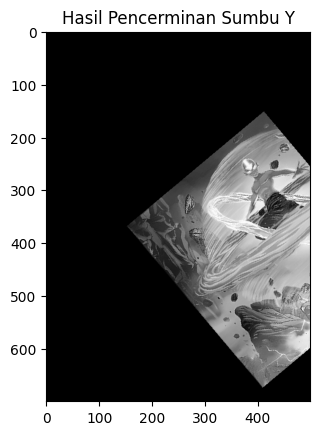

In [41]:
tinggirt , lebarrt = rotasi.shape

mirrorY = np.zeros((tinggirt, lebarrt)).astype(int)
for i in range (tinggirt) :
    for j in range (lebarrt) :
        mirrorY[i][j] = rotasi[i][lebarrt-j-1]
plt.title("Hasil Pencerminan Sumbu Y")   
plt.imshow(mirrorY,cmap="gray")

fungsi dibawah memperbesar ukuran citra, sehingga ukuran citra menjadi tiga kali lebih besar dari ukuran citra aslinya. citra hasil dilatasi yang berukuran tiga kali lebih besar dari citra asli, namun dengan piksel-piksel yang sudah diperbesar.

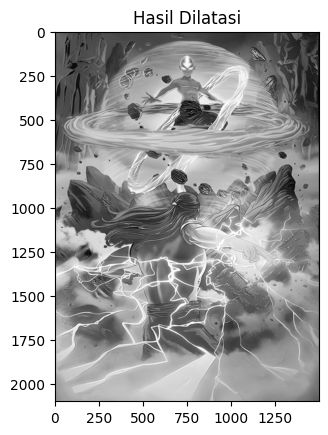

In [42]:
latasi = np.zeros((tinggi*3, lebar*3)).astype(int)
for i in range (tinggi*3) :
    for j in range (lebar*3) :
        tinggibaru = int(tinggi * i / (tinggi*3))
        lebarbaru = int(lebar * j / (lebar*3))
        latasi[i][j] =  grayimage[tinggibaru][lebarbaru]
plt.title("Hasil Dilatasi")                                 
plt.imshow(latasi,cmap="gray")